In [9]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
sample = sps.norm.rvs(size=100)

### Точный доверительный интервал уровня доверия 0.95 для $a$ c известным $\sigma^2$.

$\mathbb{P}\left( \bar{X} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le \mu \le \bar{X} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\right) = 1-\alpha$, где $z_{1-\frac{\alpha}{2}}$ - квантиль стандартного нормального распределения.

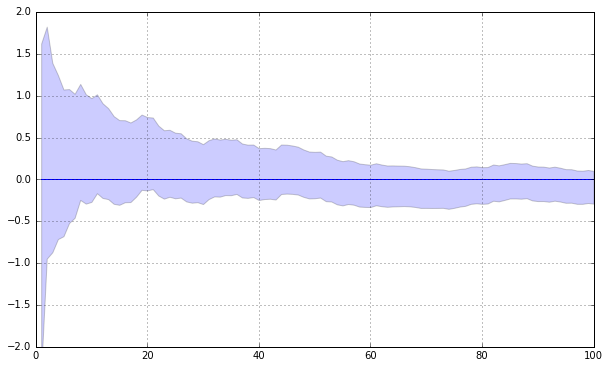

In [53]:
plt.figure(figsize=(10, 6))
x = np.arange(1, 101)
mean = sample.cumsum() / np.arange(1, 101)
est1 = mean - sps.norm.ppf(0.975) / np.sqrt(np.arange(1, 101))
est2 = mean + sps.norm.ppf(0.975) / np.sqrt(np.arange(1, 101))
plt.fill_between(x, est1, est2, alpha=0.2)
plt.plot(x, np.zeros(100))
plt.ylim(-2, 2)
plt.grid()

### Точный доверительный интервал уровня доверия 0.95 для $a$ c неизвестным $\sigma^2$.

$\mathbb{P}\left( \bar{X} - t_{1-\frac{\alpha}{2},n-1} \frac{\sqrt{S^2}}{\sqrt{n}} \le \mu \le \bar{X} + t_{1-\frac{\alpha}{2},n-1} \frac{\sqrt{S^2}}{\sqrt{n}}\right) = 1-\alpha$, где $t_{1-\frac{\alpha}{2},n-1}$ - квантиль распределения Стьюдента с $n-1$ степенями свободы.

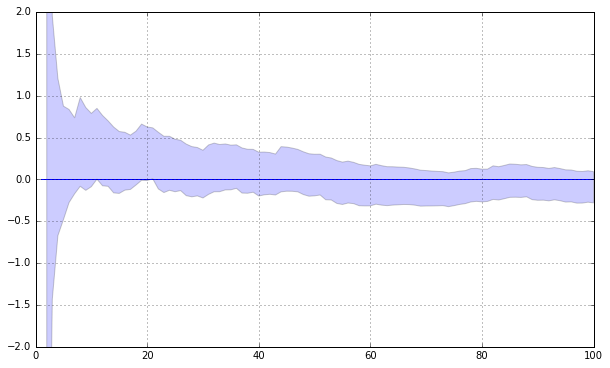

In [54]:
plt.figure(figsize=(10, 6))
x = np.arange(1, 101)
mean = sample.cumsum() / np.arange(1, 101)
mean_2 = (sample ** 2).cumsum() / np.arange(1, 101)
dev = np.sqrt(mean_2 - mean ** 2)
ppf_s = np.array([sps.t.ppf(0.975, df=n-1) for n in range(1, 101)])
est1 = mean - ppf_s *  dev / np.sqrt(np.arange(1, 101))
est2 = mean + ppf_s * dev / np.sqrt(np.arange(1, 101))
plt.fill_between(x, est1, est2, alpha=0.2)
plt.plot(x, np.zeros(100))
plt.ylim(-2, 2)
plt.grid()

### Точный доверительный интервал уровня доверия 0.95 для $\sigma^2$ c известным параметром $a$.

$\mathbb{P}\left(  \frac{\sum\limits_{i=1}^n X_i^2}{\chi^2_{\frac{1+\alpha}{2},n}} \leqslant  \sigma^2 \leqslant \frac{\sum\limits_{i=1}^n X_i^2}{\chi^2_{\frac{1-\alpha}{2},n}} \right) = \alpha.$, где $\chi^2_{\frac{1+\alpha}{2},n}$ - квантиль распределения хи-квадрат с $n$ степенями свободы.

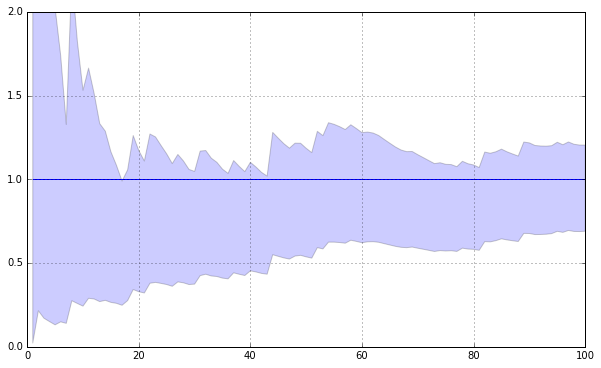

In [55]:
plt.figure(figsize=(10, 6))
mean_2 = (sample ** 2).cumsum()
ppf_1 = np.array([sps.chi2.ppf(0.975, df=n) for n in range(1, 101)])
ppf_2 = np.array([sps.chi2.ppf(0.025, df=n) for n in range(1, 101)])
est1 = mean_2 / ppf_1
est2 = mean_2 / ppf_2
x = np.arange(1, 101)
plt.fill_between(x, est1, est2, alpha=0.2)
plt.plot(x, np.ones(100))
plt.ylim(0, 2)
plt.grid()

### Точный доверительный интервал уровня доверия 0.95 для $\sigma^2$ c неизвестным параметром $a$.

$\mathbb{P}\left(  \frac{(n-1) S^2}{\chi^2_{\frac{1+\alpha}{2},n-1}} \leqslant \sigma^2 \leqslant\frac{(n-1)S^2}{\chi^2_{\frac{1-\alpha}{2},n-1}} \right) = \alpha.$

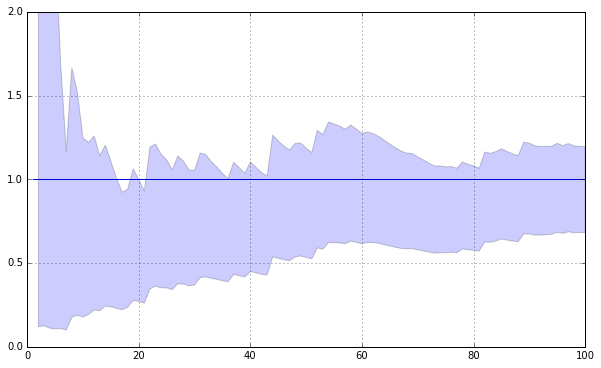

In [56]:
plt.figure(figsize=(10, 6))
x = np.arange(1, 101)
mean = sample.cumsum() / np.arange(1, 101)
mean_2 = (sample ** 2).cumsum() / np.arange(1, 101)
dev = mean_2 - mean ** 2
ppf_1 = np.array([sps.chi2.ppf(0.975, df=n) for n in range(100)])
ppf_2 = np.array([sps.chi2.ppf(0.025, df=n) for n in range(100)])
est1 = np.arange(100) * dev / ppf_1
est2 = np.arange(100) * dev / ppf_2
plt.fill_between(x, est1, est2, alpha=0.2)
plt.plot(x, np.ones(100))
plt.ylim(0, 2)
plt.grid()

### Видим, что знание одного из параметров при оценке другого существенно только при малых размерах выборки. 

### При достаточно больших размерах выборки доверительные интервалы мало отличимы.